## Medical Insurence Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

- The project is about male and female population of smoker in an age group , does they have children or not add on which region they come from  , Calculating BMI (BODY MASS INDEX), and how much insurence they charge

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/data
- The data consists of  7column and 2700 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('data\medical_insurance.csv')

In [18]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.8618
2768,21,female,34.600,0,no,southwest,2020.177
2769,19,male,26.030,1,yes,northwest,16450.8947
2770,23,male,18.715,0,no,northwest,21595.38229


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


In [20]:
df.shape

(2772, 7)

### 2.2 Dataset information

- Sex : Male,Female
- Age 
- Bmi :Body mass count
- Smoker : YES / NO
- Region : Northeast, Northwest, Southeast, Southwest
- Charges: Insurance Charge




### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [21]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data set

### 3.3 Check data types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 151.7+ KB


### 3.4 Checking the number of unique values of each column

In [23]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1338
dtype: int64

### 3.5 Check statistics of data set

In [24]:
df.describe()

,age,bmi,children
count,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732
std,14.081459,6.129449,1.214806
min,18.000000,15.960000,0.000000
25%,26.000000,26.220000,0.000000
50%,39.000000,30.447500,1.000000
75%,51.000000,34.770000,2.000000
max,64.000000,53.130000,5.000000


- Age Distribution: The dataset includes adults aged 18 to 64, with a median age of 39, suggesting a balanced age range.

- BMI Range: BMI values range from 15.96 to 53.13, with a mean of 30.70, indicating the presence of individuals with varying body mass indexes.

- Children: Most individuals have 0 to 2 children, with a few having up to 5.

- Charges: Medical charges show significant variation, with a median of around $9333.01 and a wide range, highlighting differing healthcare costs across individuals.


### 3.7 Exploring Data

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


In [26]:

print("Categories in 'sex' variable:  ",end=" ")
print(df['sex'].unique())


print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())


print("Categories in 'region' variable:  ",end=" ")
print(df['region'].unique())

Categories in 'sex' variable:   ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in 'region' variable:   ['southwest' 'southeast' 'northwest' 'northeast']


#### define numerical & categorical columns


In [27]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = []

for feature in df.columns:
    if df[feature].dtype =='O':
        categorical_features.append(feature)

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['age', 'bmi', 'children']

We have 4 categorical features : ['sex', 'smoker', 'region', 'charges']


In [28]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523


### 3.8 Deep Dive comparing

- BMI + SMOKER = CHARGES RANGE COMPARISM
- Bins and labels are added

In [43]:
import pandas as pd

# Load the data
file_path = 'data\medical_insurance.csv'
data = pd.read_csv(file_path)

# Convert 'charges' column to numeric, forcing errors to NaN
data['charges'] = pd.to_numeric(data['charges'], errors='coerce')

# Drop rows with NaN 'charges'
data = data.dropna(subset=['charges'])

# Define BMI categories
bins = [0, 18.5, 24.9, 29.9, 39.9, 49.9, 59.9, 69.9, 79.9, 89.9, 100]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III', 'Obesity IV', 'Obesity V', 'Obesity VI', 'Obesity VII']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

# Group by smoker status and BMI category, then calculate the mean charges
charge_summary = data.groupby(['smoker', 'bmi_category'])['charges'].mean().unstack()
print(charge_summary)


bmi_category   Underweight  Normal weight    Overweight     Obesity I  \
smoker                                                                  
no             5532.992453    7536.491519   8436.936190   8844.039366   
yes           18809.824980   19942.223641  22297.826675  40601.117518   

bmi_category    Obesity II  Obesity III  Obesity IV  Obesity V  Obesity VI  \
smoker                                                                       
no             8337.841591   1800.75895         NaN        NaN         NaN   
yes           45451.177546  44501.39820         NaN        NaN         NaN   

bmi_category  Obesity VII  
smoker                     
no                    NaN  
yes                   NaN  


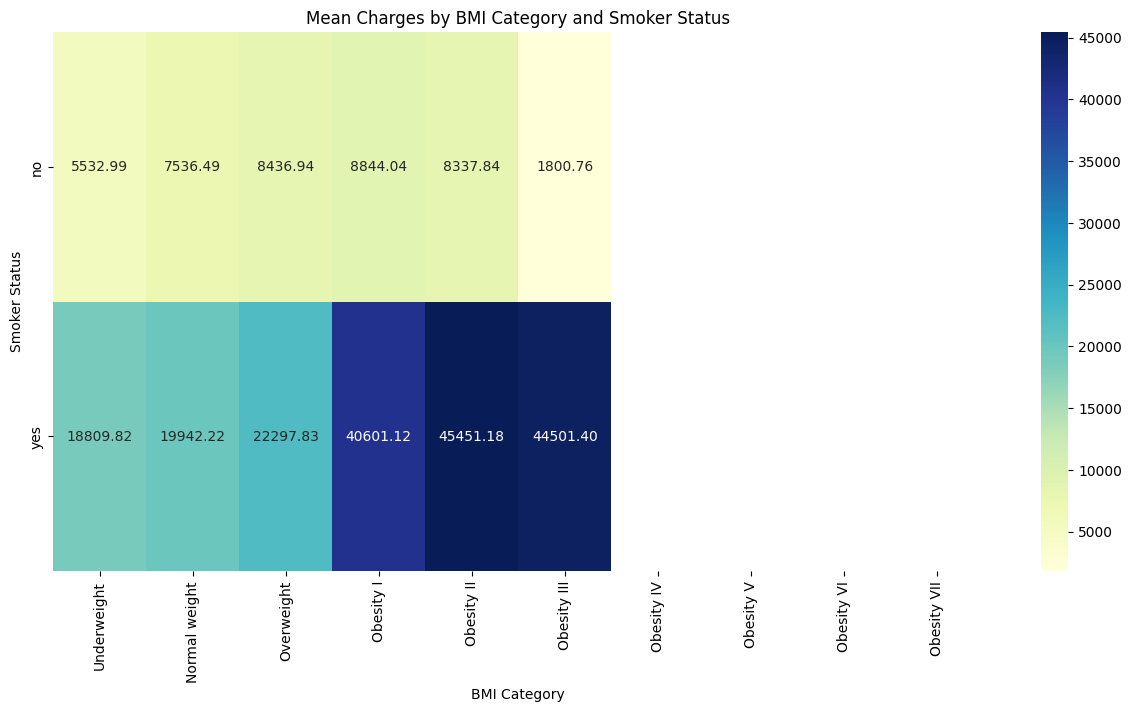

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(charge_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Charges by BMI Category and Smoker Status')
plt.xlabel('BMI Category')
plt.ylabel('Smoker Status')
plt.show()

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

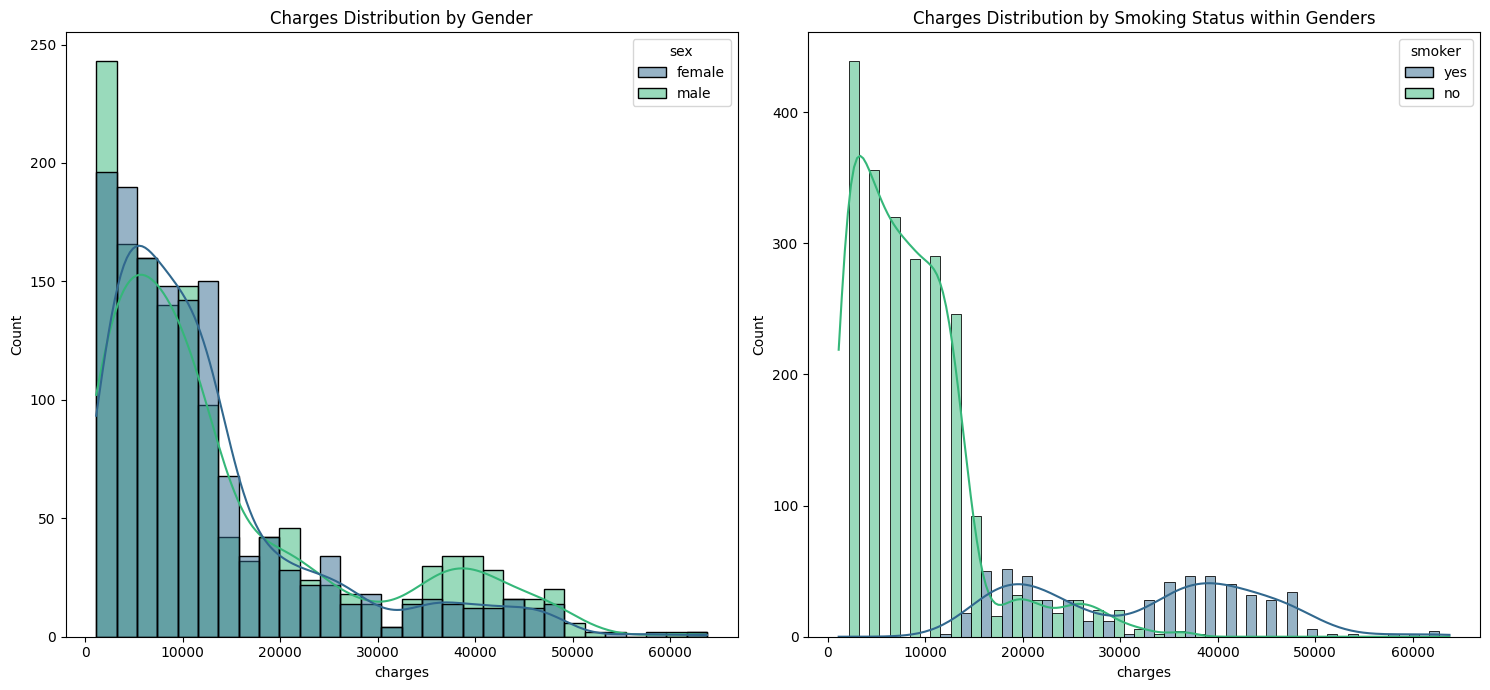

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Compare charges for males and females
plt.subplot(121)
sns.histplot(data=data, x='charges', bins=30, kde=True, hue='sex', palette='viridis')
plt.title('Charges Distribution by Gender')

# Compare charges for smokers and non-smokers within each gender
plt.subplot(122)
sns.histplot(data=data, x='charges', bins=30, kde=True, hue='smoker', palette='viridis', multiple="dodge", hue_order=['yes', 'no'])
plt.title('Charges Distribution by Smoking Status within Genders')

plt.tight_layout()
plt.show()


#### Insight

- First Plot: Compares the distribution of charges for males and females.
- Second Plot: Compares the distribution of charges for smokers and non-smokers within the entire dataset.

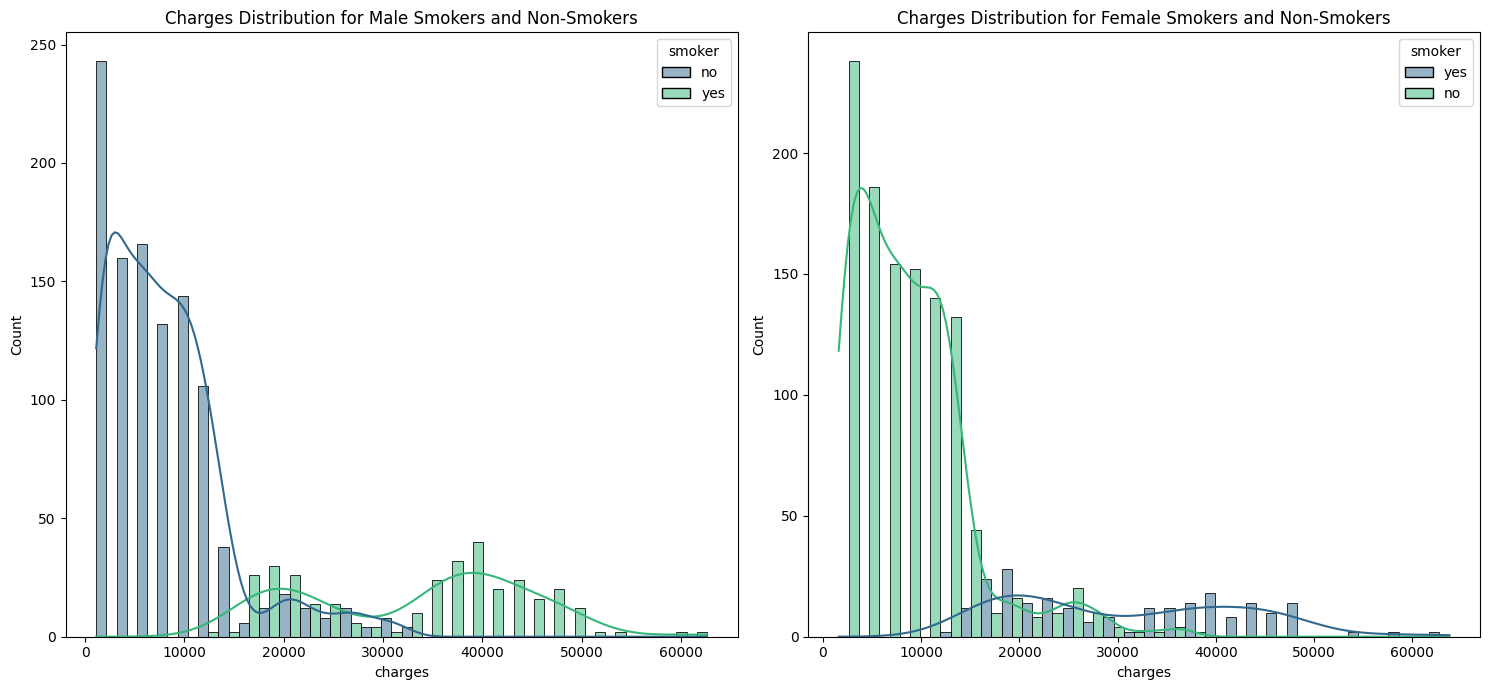

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Compare charges for male smokers and non-smokers
plt.subplot(121)
sns.histplot(data=data[data['sex'] == 'male'], x='charges', bins=30, kde=True, hue='smoker', palette='viridis', multiple="dodge")
plt.title('Charges Distribution for Male Smokers and Non-Smokers')

# Compare charges for female smokers and non-smokers
plt.subplot(122)
sns.histplot(data=data[data['sex'] == 'female'], x='charges', bins=30, kde=True, hue='smoker', palette='viridis', multiple="dodge")
plt.title('Charges Distribution for Female Smokers and Non-Smokers')

plt.tight_layout()
plt.show()


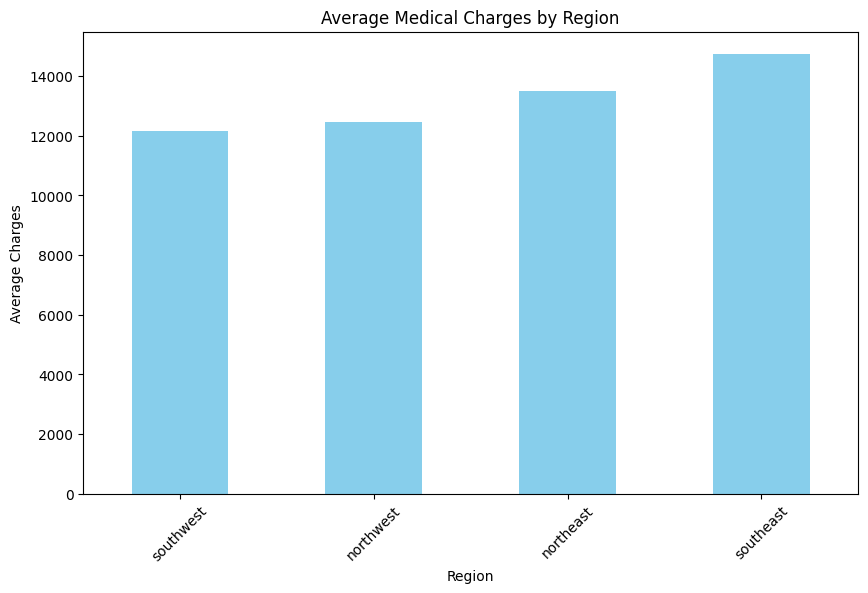

Highest average charges: southeast with $14748.78
Lowest average charges: southwest with $12164.20


In [45]:


# Group by region and calculate the average charges
region_charges = data.groupby('region')['charges'].mean().sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
region_charges.plot(kind='bar', color='skyblue')
plt.title('Average Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()

# Identify regions with highest and lowest average charges
highest_region = region_charges.idxmax()
lowest_region = region_charges.idxmin()

print(f"Highest average charges: {highest_region} with ${region_charges[highest_region]:.2f}")
print(f"Lowest average charges: {lowest_region} with ${region_charges[lowest_region]:.2f}")


#### Insight avg medical charge as per region
- we can see that southeast charges more comparing to others

- overall charges range around 12000 to 14000


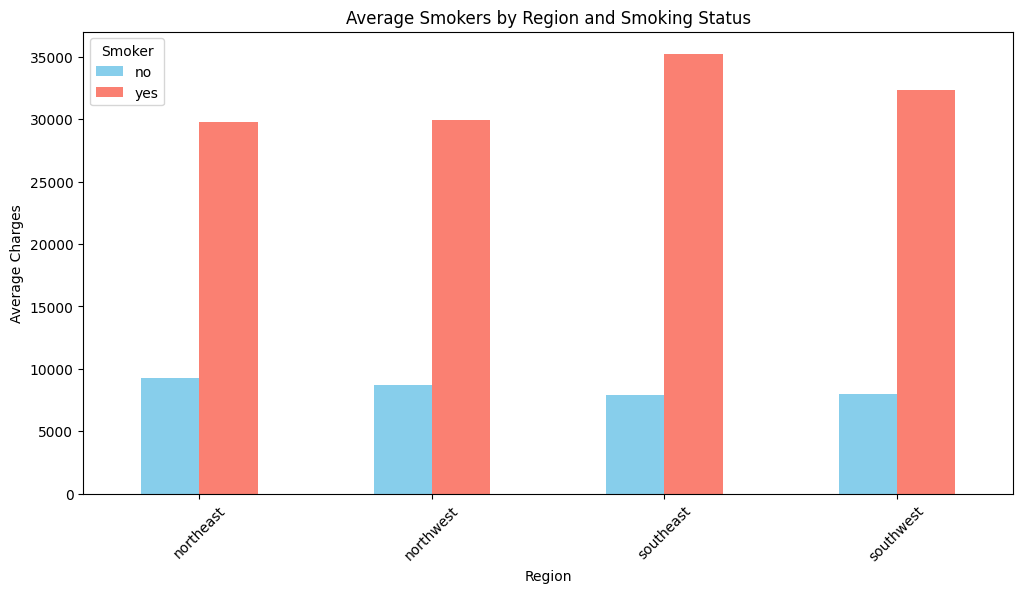

In [51]:
region_smoker_charges = data.groupby(['region', 'smoker'])['charges'].mean().unstack()

# Plot the results
region_smoker_charges.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Average Smokers by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.legend(title='Smoker')
plt.show()

#### Avg smokers by region

- smokers and non smokers count as been made
- southeast region as both max and min no.of smokers
- overall the smokers count in all region is 30000 to 34000

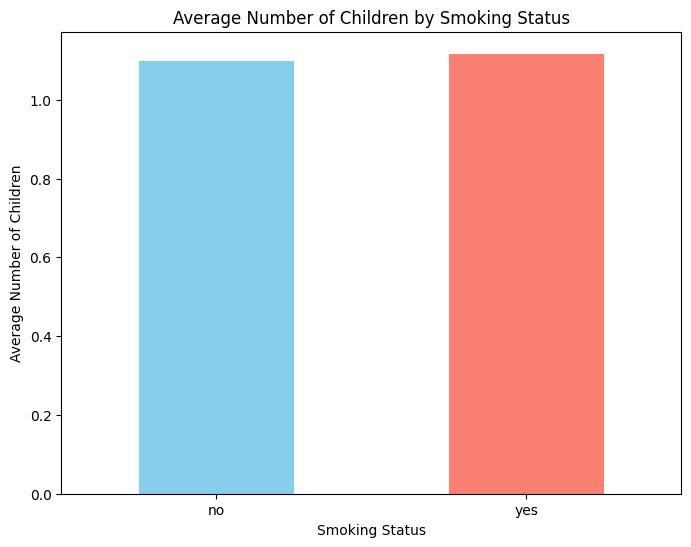

Average number of children for non-smokers: 1.10
Average number of children for smokers: 1.12


In [49]:
children_count = data.groupby('smoker')['children'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
children_count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Number of Children by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Number of Children')
plt.xticks(rotation=0)
plt.show()

# Print the average number of children for non-smokers and smokers
average_non_smoker_children = children_count['no']
average_smoker_children = children_count['yes']

print(f"Average number of children for non-smokers: {average_non_smoker_children:.2f}")
print(f"Average number of children for smokers: {average_smoker_children:.2f}")

#### Children insigth between smokers and non-smokers

- in avg 1.5 to 3 it stands the children count for both smokers and non-smokers